# KAIST Summer Session 2018

## NAVER Movie Scraper (08.13.2018)

1. Generating the list of URLs to download
2. Downloading the webpage HTML from the URLs
3. Parsing the relevant information from the downloaded HTML

In [4]:
import requests
from bs4 import BeautifulSoup

### 1. Generating the list of URLs to download

1) Download the webpage HTML which includes the URL information



2) Parsing the URL information
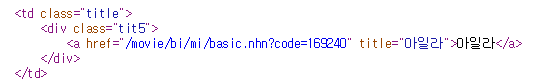

In [5]:
url_list = []
npages=2 # number of pages you want to download
for page_num in range(npages):
    response = requests.get('https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&page='+str(page_num+1))
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    url_soup = soup.find_all('div', {'class':'tit5'})
    for ul in url_soup:
        for a in ul.find_all('a'):
            print("Found the URL:", a['href'])
            url_list.append(a['href'])
            
print('Number of urls:',len(url_list))

Found the URL: /movie/bi/mi/basic.nhn?code=169240
Found the URL: /movie/bi/mi/basic.nhn?code=157243
Found the URL: /movie/bi/mi/basic.nhn?code=154667
Found the URL: /movie/bi/mi/basic.nhn?code=151196
Found the URL: /movie/bi/mi/basic.nhn?code=17421
Found the URL: /movie/bi/mi/basic.nhn?code=31170
Found the URL: /movie/bi/mi/basic.nhn?code=10200
Found the URL: /movie/bi/mi/basic.nhn?code=22126
Found the URL: /movie/bi/mi/basic.nhn?code=24452
Found the URL: /movie/bi/mi/basic.nhn?code=18988
Found the URL: /movie/bi/mi/basic.nhn?code=10048
Found the URL: /movie/bi/mi/basic.nhn?code=17159
Found the URL: /movie/bi/mi/basic.nhn?code=69105
Found the URL: /movie/bi/mi/basic.nhn?code=10002
Found the URL: /movie/bi/mi/basic.nhn?code=10102
Found the URL: /movie/bi/mi/basic.nhn?code=10016
Found the URL: /movie/bi/mi/basic.nhn?code=82432
Found the URL: /movie/bi/mi/basic.nhn?code=35901
Found the URL: /movie/bi/mi/basic.nhn?code=66463
Found the URL: /movie/bi/mi/basic.nhn?code=106360
Found the URL: 

### 2. Parsing the relevant information from the HTML

#### 2.1 Movie information parsing

1) Download the webpage HTML which includes the relevant information from the URL list
- (example) https://movie.naver.com/movie/bi/mi/basic.nhn?code=169240

2) Parsing the movie information
- (example) Audience rating

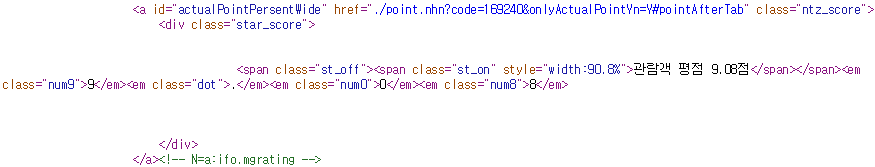

In [6]:
movie_info_collection = []

count = 0 
print("total link:", len(url_list))

for movie_url in url_list:
    
    if count % 5 ==0:
        print(str(count),"/", len(url_list))    
        
    # download the html which includes the relevant information
    response = requests.get('https://movie.naver.com'+movie_url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')

    
    # parsing for movie information
    movie_info = {}
    movie_info['url'] = 'https://movie.naver.com'+movie_url
    movie_info['ranking']=count+1
    movie_info['movie_id'] = movie_url.split('code=')[-1]
    
    a = soup.find('h3',{'class':'h_movie'})
    movie_info['title'] = a.find('a').string
        
    
    # audience_rating
    a = soup.find('a',{'class':'ntz_score'})
    movie_info['audience_rating'] = a.find('span',{'class':'st_on'}).text.split(" ")[2].split("점")[0]

    
    # expert_rating
    try:
        a = soup.find('a',{'class':'spc'})
        b = a.find('div', {'class':'star_score'})
        c = b.find_all('em')
        movie_info['expert_rating']=""
        for i in range(len(c)):        
            movie_info['expert_rating']=movie_info['expert_rating']+ c[i].string        
    except:
        movie_info['expert_rating']="없음"
        
        
    # netizen_rating
    try:
        a = soup.find('div',{'class':'star_score '})
        b = a.find_all('em')
        movie_info['netizen_rating']=""
        for i in range(len(b)):        
            movie_info['netizen_rating']=movie_info['netizen_rating']+ b[i].string        
    except:
        movie_info['netizen_rating']="없음"
        
        
    count +=1
    movie_info_collection.append(movie_info)

print("Done")

total link: 100
0 / 100
5 / 100
10 / 100
15 / 100
20 / 100
25 / 100
30 / 100
35 / 100
40 / 100
45 / 100
50 / 100
55 / 100
60 / 100
65 / 100
70 / 100
75 / 100
80 / 100
85 / 100
90 / 100
95 / 100
Done


#### 2.2 Actor information parsing


1) Download the webpage HTML which includes the relevant information from the URL list
- (example) https://movie.naver.com/movie/bi/mi/detail.nhn?code=169240

2) Parsing the actor information

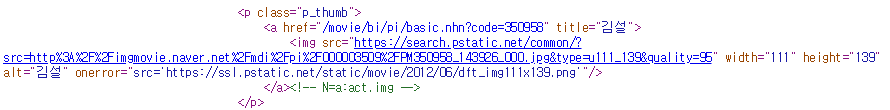

In [7]:
import os
import urllib

movie_actor_collection = []

count = 0 

for movie_url in url_list:
    
    if count % 5 ==0:
        print(str(count),"/", len(url_list))    
        
    # download the html which includes the relevant information
    movie_actor_url= movie_url.replace('basic', 'detail')
    response = requests.get('https://movie.naver.com'+movie_actor_url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')

    
    # parsing for movie information
    movie_info = {}
    movie_info['url'] = 'https://movie.naver.com'+movie_url
    movie_info['ranking']=count+1
    movie_info['movie_id'] = movie_url.split('code=')[-1]

    
    # creating a new folder
    if not(os.path.isdir('images')):
        os.makedirs('images')

    # parsing for actor information    
    a = soup.find_all('p',{'class':'p_thumb'})
    for i in range(len(a)):
        try:
            movie_info['actor_name',i] = a[i].find('a')['title']
            movie_info['actor_img',i] = a[i].find('img')['src']
            
            # download image files unless it is the default image
            if movie_info['actor_img',i] != 'https://ssl.pstatic.net/static/movie/2012/06/dft_img111x139.png':
                urllib.request.urlretrieve(movie_info['actor_img',i],'images\\'+movie_info['movie_id']+'_'+movie_info['actor_name',i]+'.jpg')
        except:
            pass
        
        
    count +=1
    movie_actor_collection.append(movie_info)

print("Done")

0 / 100
5 / 100
10 / 100
15 / 100
20 / 100
25 / 100
30 / 100
35 / 100
40 / 100
45 / 100
50 / 100
55 / 100
60 / 100
65 / 100
70 / 100
75 / 100
80 / 100
85 / 100
90 / 100
95 / 100
Done


3) Saving the data as .xlsx

In [8]:
import pandas as pd
movie_info_df = pd.DataFrame(movie_info_collection)
movie_info_df.to_excel('naver_movie_info.xlsx')

movie_actor_df = pd.DataFrame(movie_actor_collection)
movie_actor_df.to_excel('naver_movie_actor.xlsx')